<a href="https://colab.research.google.com/github/shalman13091994/self_learning/blob/main/rgb_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here, doing the image classification using the **VGG (Visual Geometry Group)**


1.   it takes 3x3 kernel (filters) to stack them deep
2.   easy to understand
3.   it has huge paramaters make memory heavy

eg: building a tower with same identical blocks





steps involves:

1. Data Ingestion
2. EDA - resizing
3. Preprocessing -normalization
4. Model Building/ Architecture - cnn, vgg, resnet, gnet
5. Model Evaluation


1. **Data Ingestion**

In [7]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 609.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 119.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.8 MB/s eta 0:00:00


In [74]:
#loading the cifar10 dataset
import tensorflow

from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train.shape

(50000, 32, 32, 3)

In [75]:
y_train.shape

(50000, 1)

In [76]:
X_test.shape

(10000, 32, 32, 3)

In [77]:
y_test.shape

(10000, 1)

In [78]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

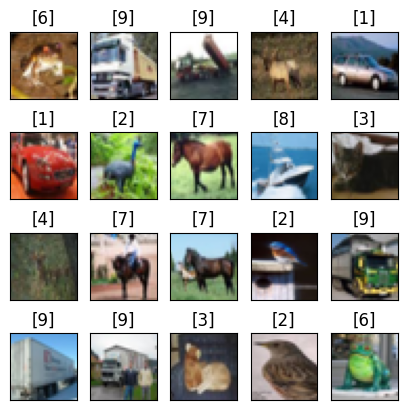

In [79]:
# visualisation of the images

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

# plt.imshow(X_train[0])
fig = plt.figure(figsize=(5,5))
for i in range(20):
     ax = fig.add_subplot(4, 5, i+1, xticks=[], yticks=[])
     ax.imshow(X_train[i])
     ax.set_title(y_train[i])


OBSERVATION:

Since, the dataset is (32, 32, 3) which is 32X32 with RGB and  have do the resizing to fit into the VGG which requires (224, 224, 3)

2. **EDA**

In [80]:
#Normalise the pixel size so divide by 255 to [0, 1]

x_train = X_train.astype('float')/255.0
x_test = X_test.astype('float')/255.0


x_train.shape


(50000, 32, 32, 3)

In [81]:
# Resize images to 224x224 to match VGG16 input size
import numpy as np
import tensorflow as tf


# x_train = tf.image.resize(x_train, (224, 224))
# x_test = tf.image.resize(x_test, (224, 224))



x_train = tf.image.resize(x_train, (64, 64))
x_test = tf.image.resize(x_test, (64, 64))

x_train.shape

TensorShape([50000, 64, 64, 3])

**CIFAR10**

0: airplane  
1: automobile  
2: bird  
3: cat  
4: deer  
5: dog  
6: frog  
7: horse  
8: ship  
9: truck

In [82]:
y_train.shape

(50000, 1)

In [83]:
#encode the y values

from keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

y_train.shape



(50000, 10)


3. **MODEL BUILDING/ MODEL ARCHITECTURE**

here, we are gng to create a sequential model above the pre-trained VGG16 model with ImageNet weights



In [84]:
#load the vgg model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPool2D, Dropout
from keras.applications.vgg16 import VGG16


#vgg16

# base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) #gpu couldn't able to train it so taking much longer time so reduced to 64

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(64, 64, 3))


# Freeze the VGG16 layers to use it as a feature extractor
base_model.trainable = False

#build the sequential model
model = Sequential()

# Add VGG16 as a base model
model.add(base_model)

# Flatten the output of the base model
model.add(Flatten())

# Add dropout to reduce overfitting
model.add(Dropout(0.5))

# Add fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 output classes for CIFAR-10

model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,768,906 (60.15 MB)

 Trainable params: 1,054,218 (4.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [85]:
# Loss Function - compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



  Train the model

In [86]:
x_train.shape

TensorShape([50000, 64, 64, 3])

In [87]:
y_train.shape

(50000, 10)

In [ ]:
from tensorflow.keras.callbacks import  ModelCheckpoint, EarlyStopping


# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True) #patience = 3 it will wait till 3 continuous val_loss improved

# check_point = ModelCheckpoint(filepath ='bestmodel.h5', verbose =1,  save_best_only=True)

# history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), callbacks=[check_point, early_stop], verbose=2, shuffle=True)

history = model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test), verbose=2, shuffle=True)


5. **MODEL EVALUATION**

In [4]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc}")
